In [4]:
# load the libraries
library(OpenStreetMap)
library(ggplot2)
library(sp)
library (rgdal)

# Extreme points of the European Union
# https://en.wikipedia.org/wiki/Extreme_points_of_the_European_Union
LAT1 =  72 ; LAT2 = 34
LON1 = -12 ; LON2 = 40


code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for me

## Load the map
Using stamen-toner (black and white), stamen-terrain or esri-terrain are good choices.

In [6]:
map <- openmap(c(LAT2,LON1), c(LAT1,LON2),
               zoom = 4,
               type = "stamen-toner",
               mergeTiles = TRUE)
print("done loading map")

[1] "done loading map"


## Load the data

In [ ]:
library("rgbif")

# load gbif ocurrences
key <- name_backbone(name='Strix aluco')$speciesKey
strix <- occ_search(taxonKey=key, limit = 1000)
# head(strix$data)
write.csv(strix$data, "data/strix.csv")
print("done writing data")

## Project map and data
Using Albers equal area projection, as it is a distribution map.

In [7]:
crs <- "+proj=aea +lat_1=43 +lat_2=62 +lat_0=30 +lon_0=10 +x_0=0 +y_0=0 +ellps=intl +units=m +no_defs"

# reproject map
map.albers <- openproj(map, projection = crs)
print("done projecting map")

[1] "done projecting map"


In [2]:
# load occurrences from csv, project occurrences
#strix_df <- read_csv("data//strix.csv")

library(readr)
strix_df_all <- read_tsv("data//GBIF_Strix.zip")
print("done reading data")

Parsed with column specification:
cols(
  .default = col_character(),
  gbifID = col_double(),
  individualCount = col_double(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  coordinateUncertaintyInMeters = col_double(),
  coordinatePrecision = col_logical(),
  elevation = col_double(),
  elevationAccuracy = col_logical(),
  depth = col_logical(),
  depthAccuracy = col_logical(),
  eventDate = col_datetime(format = ""),
  day = col_double(),
  month = col_double(),
  year = col_double(),
  taxonKey = col_double(),
  speciesKey = col_double(),
  dateIdentified = col_datetime(format = ""),
  typeStatus = col_logical(),
  establishmentMeans = col_logical(),
  lastInterpreted = col_datetime(format = "")
)

See spec(...) for full column specifications.

Warning message:
“7238 parsing failures.
 row               col           expected actual                   file
  44 locality          delimiter or quote    C   'data//GBIF_Strix.zip'
  44 locality          delimite

[1] "done reading data"


In [30]:
#head(strix_df_all)
#colnames(strix_df_all)
#strix_df_all[sample(nrow(strix_df_all), 3),]
length(strix_df_all)
strix_df_clean <- strix_df_all[ !is.na(strix_df_all$decimalLatitude) & !is.na(strix_df_all$decimalLongitude), ]
# sample 
strix_df <- strix_df_clean[sample(nrow(strix_df_clean), 5000),]
head(strix_df_all$decimalLongitude)
coordinates(strix_df) <- c("decimalLongitude", "decimalLatitude")
data.frame(strix_df$datasetKey)

[1] 50

[1] 2.3993 2.2804 2.1607 2.5192 2.3993 2.3993

strix_df.datasetKey                 
1    e7cbb0ed-04c6-44ce-ac86-ebe49f4efb28
2    38b4c89f-584c-41bb-bd8f-cd1def33e92f
3    38b4c89f-584c-41bb-bd8f-cd1def33e92f
4    e7cbb0ed-04c6-44ce-ac86-ebe49f4efb28
5    95db4db8-f762-11e1-a439-00145eb45e9a
6    38b4c89f-584c-41bb-bd8f-cd1def33e92f
7    38b4c89f-584c-41bb-bd8f-cd1def33e92f
8    38b4c89f-584c-41bb-bd8f-cd1def33e92f
9    daae5a66-7bb4-4431-ac3c-a1bf70ca3407
10   ca435754-9190-4a87-9b2c-c21563898294
11   38b4c89f-584c-41bb-bd8f-cd1def33e92f
12   38b4c89f-584c-41bb-bd8f-cd1def33e92f
13   292a71df-588b-48fa-9ab5-29ae868ba88c
14   4fa7b334-ce0d-4e88-aaae-2e0c138d049e
15   38b4c89f-584c-41bb-bd8f-cd1def33e92f
16   95db4db8-f762-11e1-a439-00145eb45e9a
17   d38d6841-de2a-4a16-b39e-495402d8592b
18   b124e1e0-4755-430f-9eab-894f25a9b59c
19   38b4c89f-584c-41bb-bd8f-cd1def33e92f
20   f5e9bf91-d834-49ed-a58a-78b9cb952b35
21   6ac3f774-d9fb-4796-b3e9-92bf6c81c084
22   635f7b02-f762-11e1-a439-00145eb45e9a
23   f06fef3c-6ea6-4345-b724-a1b8e490dc55
24   95db4db8-f762-11e1-a439-00145eb45e9a
25   e7cbb0ed-04c6-44ce-ac86-ebe49f4efb28
26   e7cbb0ed-04c6-44ce-ac86-ebe49f4efb28
27   38b4c89f-584c-41bb-bd8f-cd1def33e92f
28   292a71df-588b-48fa-9ab5-29ae868ba88c
29   28c7cc8e-3163-4c3d-ab4e-31ebd28b068d
30   38b4c89f-584c-41bb-bd8f-cd1def33e92f
⋮    ⋮                                   
4971 e7cbb0ed-04c6-44ce-ac86-ebe49f4efb28
4972 e7cbb0ed-04c6-44ce-ac86-ebe49f4efb28
4973 e7cbb0ed-04c6-44ce-ac86-ebe49f4efb28
4974 4fa7b334-ce0d-4e88-aaae-2e0c138d049e
4975 292a71df-588b-48fa-9ab5-29ae868ba88c
4976 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4977 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4978 8a863029-f435-446a-821e-275f4f641165
4979 292a71df-588b-48fa-9ab5-29ae868ba88c
4980 8a6c67f5-22ce-4b76-b9ac-b39c7a914cba
4981 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4982 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4983 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4984 b124e1e0-4755-430f-9eab-894f25a9b59c
4985 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4986 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4987 b124e1e0-4755-430f-9eab-894f25a9b59c
4988 7d17a2b2-8751-41b5-ac9b-48effc1ea236
4989 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4990 95db4db8-f762-11e1-a439-00145eb45e9a
4991 292a71df-588b-48fa-9ab5-29ae868ba88c
4992 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4993 95db4db8-f762-11e1-a439-00145eb45e9a
4994 95db4db8-f762-11e1-a439-00145eb45e9a
4995 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4996 8a863029-f435-446a-821e-275f4f641165
4997 6ac3f774-d9fb-4796-b3e9-92bf6c81c084
4998 38b4c89f-584c-41bb-bd8f-cd1def33e92f
4999 95db4db8-f762-11e1-a439-00145eb45e9a
5000 95db4db8-f762-11e1-a439-00145eb45e9a

In [41]:
EBIRD_KEY="4fa7b334-ce0d-4e88-aaae-2e0c138d049e"
INAT_KEY="50c9509d-22c7-4a22-a47d-8c48425ef4a7"
# sample 
strix_df_clean <- strix_df_all[ 
    strix_df_all$decimalLongitude > LON1 & strix_df_all$decimalLongitude < LON2 & 
    strix_df_all$decimalLatitude < LAT1 & strix_df_all$decimalLatitude > LAT2
    , ]
strix_df_clean <- strix_df_clean[strix_df_clean$datasetKey == EBIRD_KEY,]
strix_df_clean <- strix_df_clean[ !is.na(strix_df_clean$decimalLatitude) & !is.na(strix_df_clean$decimalLongitude), ]
#strix_df <- strix_df_clean[sample(nrow(strix_df_clean), 100),]
 strix_df <- strix_df_clean
# project
coordinates(strix_df) <- c("decimalLongitude", "decimalLatitude")
proj4string(strix_df) <- CRS("+proj=longlat +ellps=clrk66")
# summary(strix_df)
strix_df.albers <- spTransform(strix_df, CRS=CRS(crs))
# summary(strix_df.albers)
print("done transforming data")
colnames(data.frame(strix_df.albers))

[1] "done transforming data"


[1] "gbifID"                           "datasetKey"                      
 [3] "occurrenceID"                     "kingdom"                         
 [5] "phylum"                           "class"                           
 [7] "order"                            "family"                          
 [9] "genus"                            "species"                         
[11] "infraspecificEpithet"             "taxonRank"                       
[13] "scientificName"                   "verbatimScientificName"          
[15] "verbatimScientificNameAuthorship" "countryCode"                     
[17] "locality"                         "stateProvince"                   
[19] "occurrenceStatus"                 "individualCount"                 
[21] "publishingOrgKey"                 "coordinateUncertaintyInMeters"   
[23] "coordinatePrecision"              "elevation"                       
[25] "elevationAccuracy"                "depth"                           
[27] "depthAccuracy"                    "eventDate"                       
[29] "day"                              "month"                           
[31] "year"                             "taxonKey"                        
[33] "speciesKey"                       "basisOfRecord"                   
[35] "institutionCode"                  "collectionCode"                  
[37] "catalogNumber"                    "recordNumber"                    
[39] "identifiedBy"                     "dateIdentified"                  
[41] "license"                          "rightsHolder"                    
[43] "recordedBy"                       "typeStatus"                      
[45] "establishmentMeans"               "lastInterpreted"                 
[47] "mediaType"                        "issue"                           
[49] "decimalLongitude"                 "decimalLatitude"                 
[51] "optional"

## Draw the map and the data

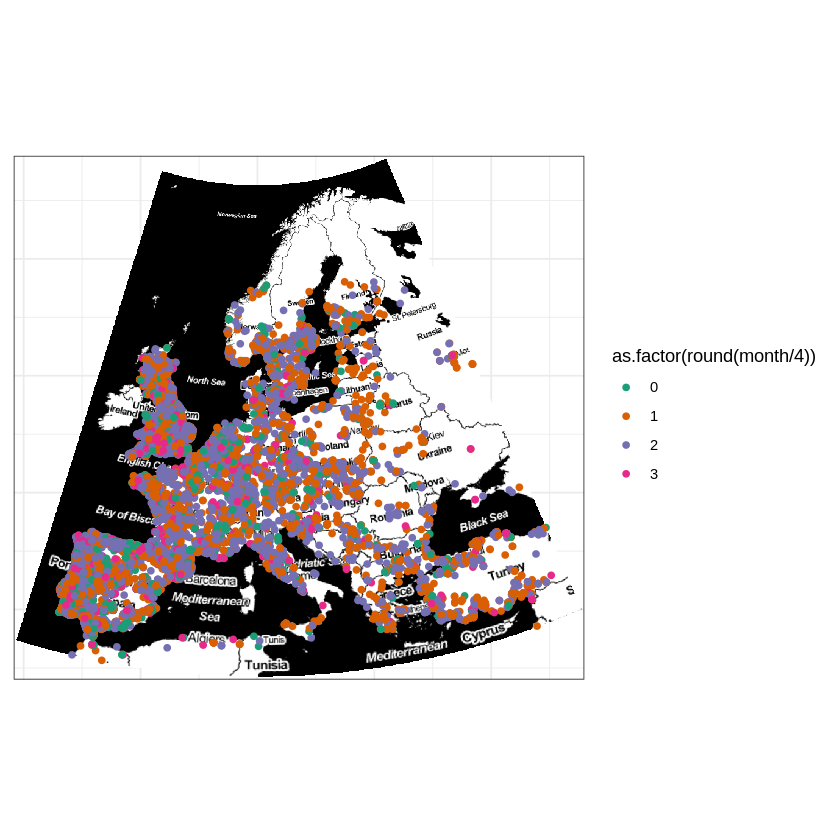

In [57]:
library(RColorBrewer)
# draw map and occurences
autoplot(map.albers) + 
    geom_point(
        data = data.frame(strix_df.albers), 
        aes(x = decimalLongitude, y = decimalLatitude, color=as.factor(round(month/4))),
        alpha=1) + 
    theme_bw() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()
          #,
        #legend.position="none"
         ) +
    scale_color_brewer(palette = "Dark2") 
    

## References

In [ ]:
# get data source citations
# data_sources <- gbif_citation(strix)
# data_sources

GBIF.org (16 August 2020) GBIF Occurrence Download https://doi.org/10.15468/dl.qp5ace 